## Vapor Field in 2 dimensions -- Neumann square inside a circular Dirichlet boundary 

### Part 1. Analytical solution in polar coordinates 
We're considering the diffusion equation in two dimensions, in which a crystal extending to the right a distance $L$ from the origin, is situated in a box that goes out to $x_f$. We have

$$
{\partial P_{vap} \over \partial t}  = D_{vap} \nabla^2 P_{vap} - g_{vap} {1 \over \Delta r} \ \ \ \ (1)
$$

where ${1 \over \Delta r}$ simulates a Dirac delta function positioned at $r=L_{eff}$, and $P_{f}$ is the vapor pressure at the far field ($r_f$), where Dirichlet conditions will be assumed. We presume we can specify $P_{f}$ and $r_f$, because we have data regarding the spacing between ice crystals in cirrus clouds, and the humidity. $g_{vap}$ is vapor analog of the growth rate of the crystal, $g_{ice}$ (in $\mu m/s$), given by

$$
g_{vap} = g_{ice}  {\rho_{ice} RT \over M_{H_2O}} \ \ \ \ (2)
$$

which we can also specify because we have an idea of how fast ice crystals grow. The Laplacian in polar coordinates is 

$$
 \nabla^2 = {\partial ^2 \over \partial r^2} + {2 \over r}{\partial \over \partial r} \ \ \ \ (3)
$$

Outside the Neumann region (at $r=L_{eff}$), steady-state solution to Eq. 1 requires $\nabla^2P_{vap}=0$, which is satisfied by

$$
P_{vap} = P_1 \times (1-{r_0 \over r})  \ \ \ \ (4)
$$

We can find $P_1$ and $r_0$ using Dirichlet and Neumann conditions. The Dirichlet condition is that at the far field, we have 

$$
P_f \equiv P_{vap}(r_f) = P_1 \times (1-{r_0 \over r_f})  \ \ \ \ (5)
$$

where we assume we can specify $r_f$ and $P_f$ based on physical conditions in a cirrus cloud. The Neumann condition is arrived at by saying that, at $L_{eff}$, the first term in Eq. 3 becomes

$$
 {\partial ^2 P_{vap} \over \partial r^2} = {1 \over \Delta r} {\partial P_{vap} \over \partial r} = P_1 {1 \over \Delta r} {r_0 \over r^2} = P_1 {1 \over \Delta r} {r_0 \over L_{eff}^2} \ \ \ \ (6)
$$

where $\Delta r$ is the width of the "head space," i.e., region just above the growing ice crystal, from which water vapor is removed and converted into ice. The second term in Eq. 3 becomes, at $L_{eff}$, 

$$
{2 \over r}{\partial P_{vap} \over \partial r} =  {2 \over r} P_1 {r_0 \over r^2} = {2 r_0 \over L_{eff}^3} P_1 \ \ \ \ (7)
$$

so the diffusion term becomes

$$
D_{vap} \nabla^2 P_{vap} = D_{vap} \times (P_1 {1 \over \Delta r} {r_0 \over L_{eff}^2} + {2 r_0 \over L_{eff}^3} P_1) = D_{vap} P_1 {r_0 \over L_{eff}^2} \times ({{1 \over \Delta r} + {1 \over L_{eff}}} ) \ \ \ \ (8)
$$

We will suppose that the head space is small compared to the crystal, so Eq. 8 becomes

$$
D_{vap} \nabla^2 P_{vap} \approx D_{vap} P_1 {r_0 \over L_{eff}^2} \times {1 \over \Delta r}  \ \ \ \ (9)
$$

Within this head space, steady state requires that $D_{vap} \nabla^2 P_{vap} = g_{vap} {1 \over \Delta r}$, so 

$$
D_{vap} P_1 {r_0 \over L_{eff}^2} \times {1 \over \Delta r} = g_{vap} {1 \over \Delta r}
$$ 

which allows us to eliminate $\Delta r$. Then, with the help of Eq. 5, we can eliminate $P_1$, giving

$$
D_{vap} {P_f \over (1-{r_0 \over r_f})} {r_0 \over L_{eff}^2} = g_{vap} \ \ \ \ (10)
$$

which leads to

$$
r_0 =  {r_f \over 1+\chi} \ \ \ \ (11)
$$

where 

$$
\chi = {D_{vap}P_f r_f \over g_{vap} L_{eff}^2} = {D_{vap}P_f r_f M_{H_2O} \over g_{ice} \rho_{ice} RT L_{eff}^2}  \ \ \ \ (12)
$$

Once we have $r_0$, we can get $P_1$ from Eq. 2, inverted:

$$
P_1 = {P_f \over 1-{r_0 \over r_f}} \ \ \ \ (13)
$$

### Part 2. Finding the effective radius of the circular crystal representing a square crystal
There's a question about how to specify the effective radius of our circular crystal, $L_{eff}$. Here, we assign this value such that the circumference of the circular crystal equals the perimeter length of a square crystal,

$$
L_{eff} = {8 L \over 2 \pi} \ \ \ \ (14) 
$$

where $L$ equals one half the length of each side of the square.

Once we have values for $P_1$ and $r_0$, we can use Eq. 4 to calculate $P_{vap}$ over any range of distances away from the circular crystal. We can also extend that same solution inward, to the distance $L$, which corresponds to the side of the square crystal at $y=0$, or outward to any corner of the square crystal (e.g., at $x=y=2^{1/2}L$).)

### References
Diffusion coefficient, see https://acp.copernicus.org/articles/20/12569/2020/#&gid=1&pid=1 for cirrus cloud conditions

In [20]:
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
from importlib import reload
from matplotlib import rcParams

# QLC-specific code
import QLCstuff as QLC; reload(QLC)

<module 'QLCstuff' from '/Users/nesh/Documents/Repositories/icecontinuum/nesh/Integrated_QLC_VF/QLCstuff.py'>

In [21]:
%matplotlib notebook
ticklabelsize = 15
linewidth = 1
fontsize = 15
color = 'k'
markersize = 10

### Defining system and run parameters

In [22]:
# Preferred units
distance_unit = 'micrometer'
pressure_unit = 'pascal'
time_unit = 'microsecond'
temperature_unit = 'kelvin'

# Temperature
Temperature = AssignQuantity(250,'kelvin')
print('Temperature =',Temperature)

# Ambient pressure
Pressure = AssignQuantity(30,'pascal')
print('Pressure =', Pressure)

# Diffusion through air
Dvap = QLC.getDofTP(Temperature,Pressure,AssignQuantity)
print('Dvap =',Dvap)

# Size of the box
L = AssignQuantity(30,'micrometer')
print('L =', L)

# The far-field distance
x_f = AssignQuantity(2000,'micrometer')

# The far-field supersaturation
sigmaI_far_field = 0.25
print('sigmaI, far field =',sigmaI_far_field)

# Growth rate of the crystal
g_ice = AssignQuantity(8.6,'micrometer/second')
print('g_ice = ',g_ice)

# The Neumann parameter "g'"
rho_ice = AssignQuantity(0.9,'g/cm^3')
Mvap = AssignQuantity(18,'g/mol')
R = AssignQuantity(8.314,'J/mol/kelvin')
g_vap = rho_ice*g_ice*R*Temperature/Mvap; #print(gprime)
g_vap.ito('pascal * micrometer / second'); #print(gprime)
gprime = g_vap # Renaming this because it's called gprime in the code below

# Equilibrium vapor stuff
P3 = AssignQuantity(611,'Pa')
T3 = AssignQuantity(273,'kelvin')
Delta_H_sub = AssignQuantity(50,'kJ/mol')
P_vap_eq = P3*np.exp(-Delta_H_sub/R*(1/Temperature-1/T3))
print('P_vap_eq =', P_vap_eq)

# The far-field pressure
P_f = P_vap_eq * (sigmaI_far_field+1)
print('P_f =', P_f)

Temperature = 250 kelvin
Pressure = 30 pascal
Dvap = 62773.26202925995 micrometer ** 2 / microsecond
L = 30 micrometer
sigmaI, far field = 0.25
g_ice =  8.6 micrometer / second
P_vap_eq = 80.5128693847561 pascal
P_f = 100.64108673094512 pascal


### The 2-D vaporfield simulation code (box inside a far-field box)
Here we've set aspect ratio to be 1.

dx 13.333333333333334 micrometer
dy 13.333333333333334 micrometer
Using the default dt = 0.0005664124247515185 microsecond
Dxeff =  353.0995989145872 / microsecond
Dyeff =  353.0995989145872 / microsecond
uneumannx =  67.03162499999999 pascal / microsecond
uneumanny =  67.03162499999999 pascal / microsecond
Vapor pressure at this temperature =  80.5128693847561 pascal
udirichlet =  100.64108673094512 pascal
Integrating steps =  26482
Integrating out to  14.999733832269714 microsecond
    box Lx =  26.666666666666668 micrometer
    box Ly =  26.666666666666668 micrometer
    box length (y) =  4
slice(148, 152, None)
slice(148, 152, None)
Shape of u0:
   nx = 301
   ny = 301
Solving using Euler


<IPython.core.display.Javascript object>


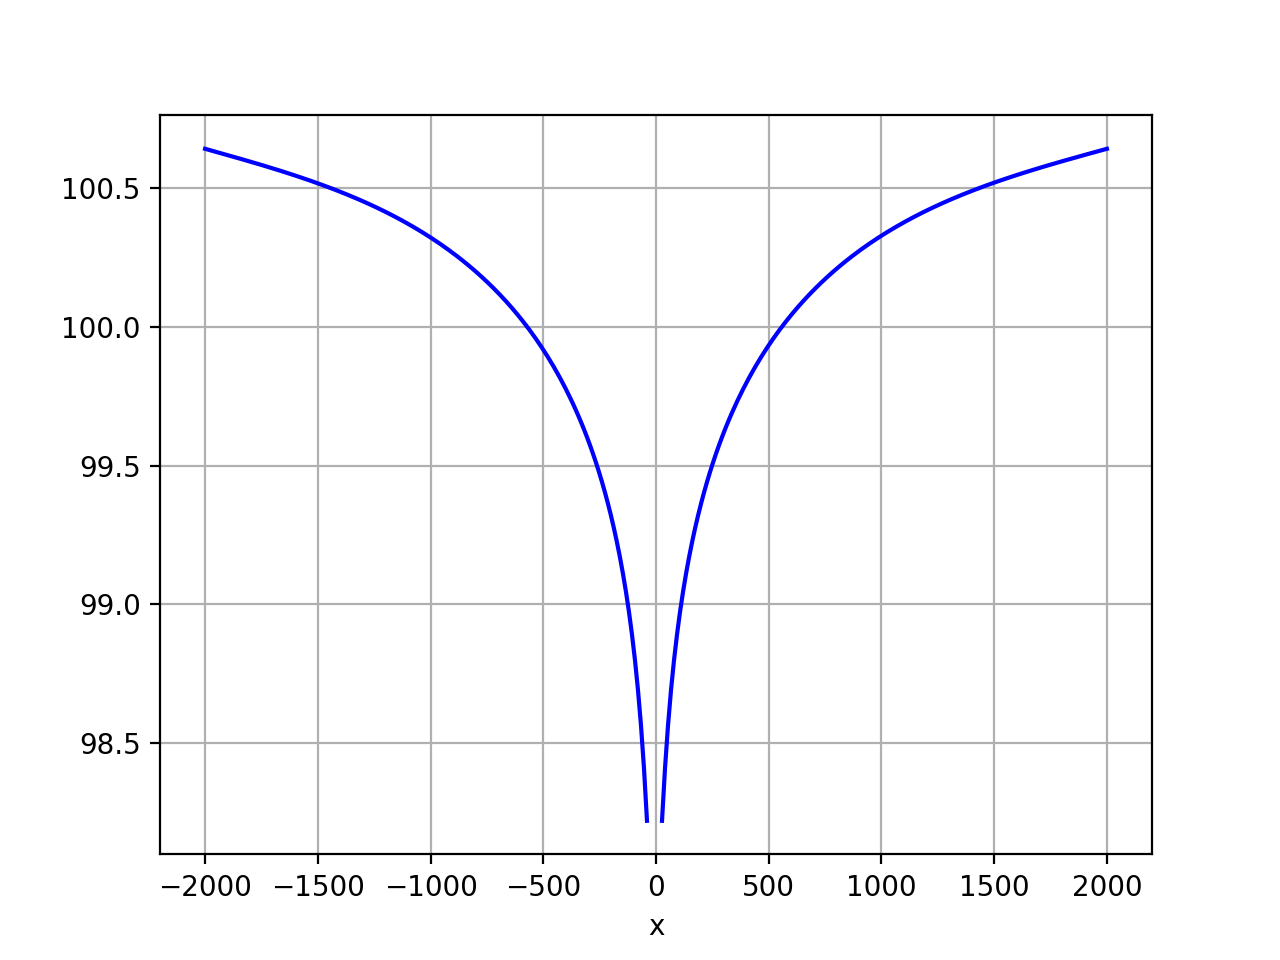

/Users/nesh/anaconda3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


<IPython.core.display.Javascript object>


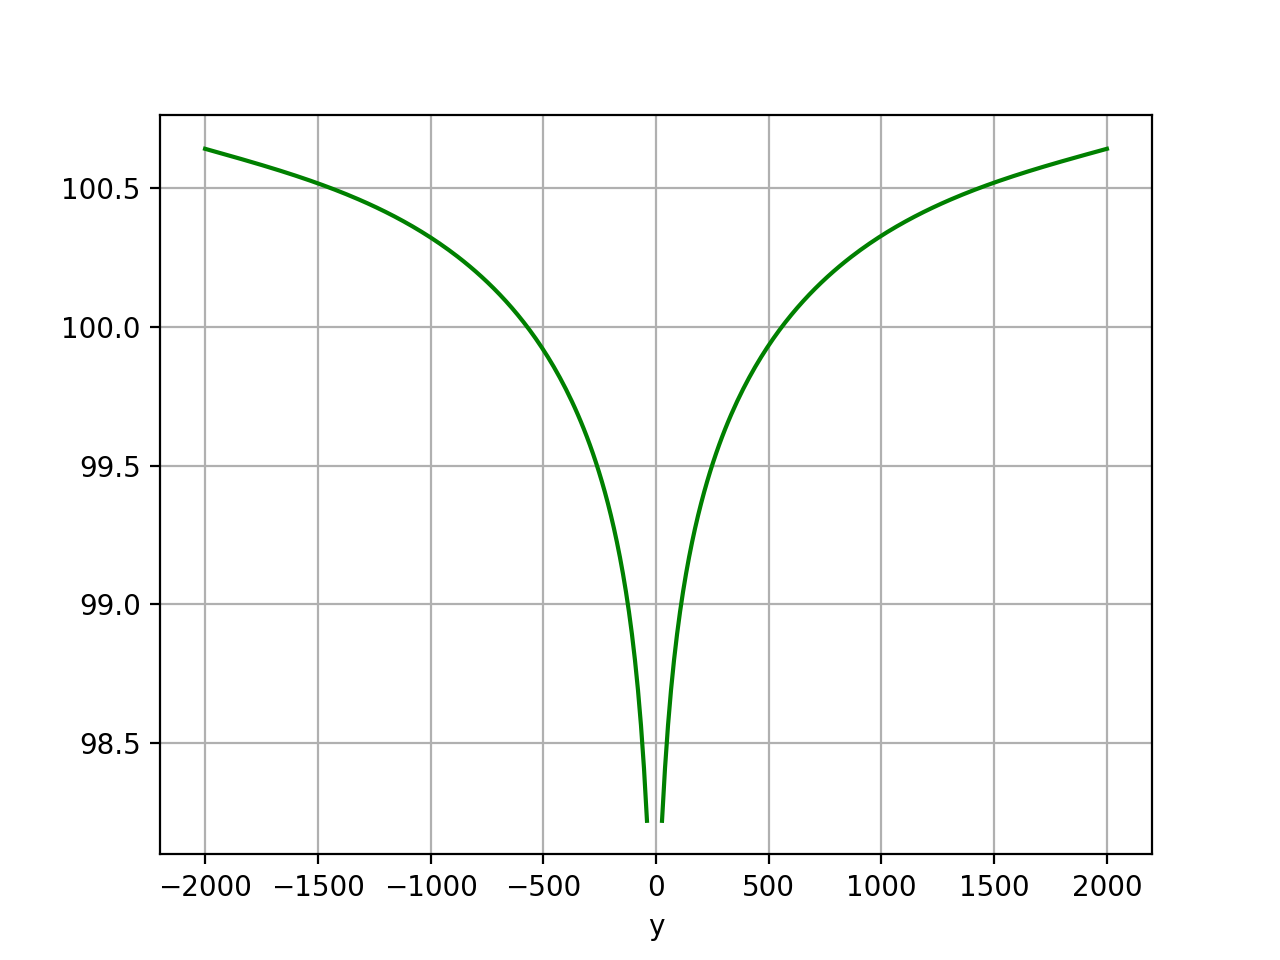

<IPython.core.display.Javascript object>


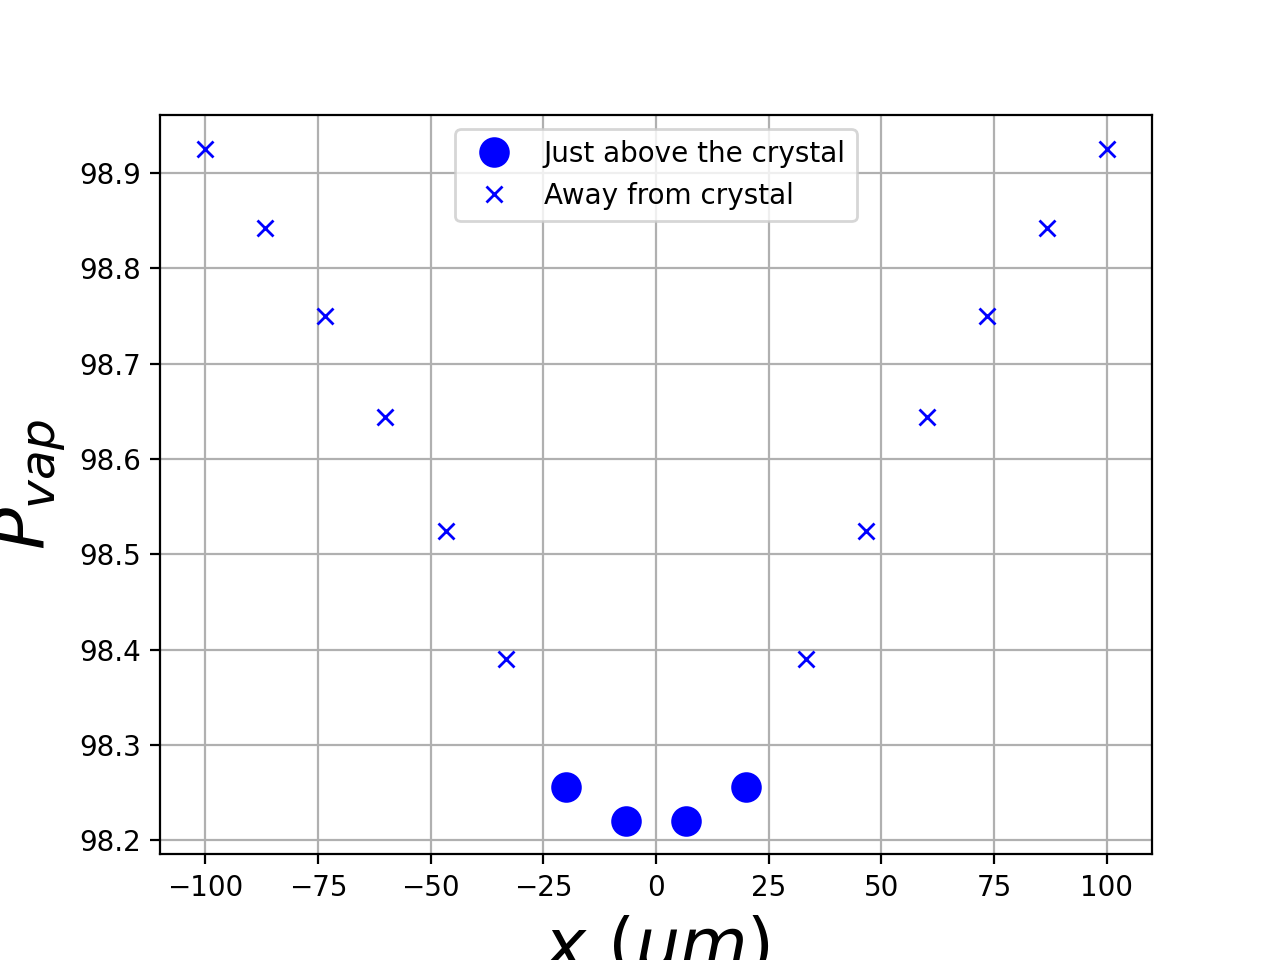

<IPython.core.display.Javascript object>


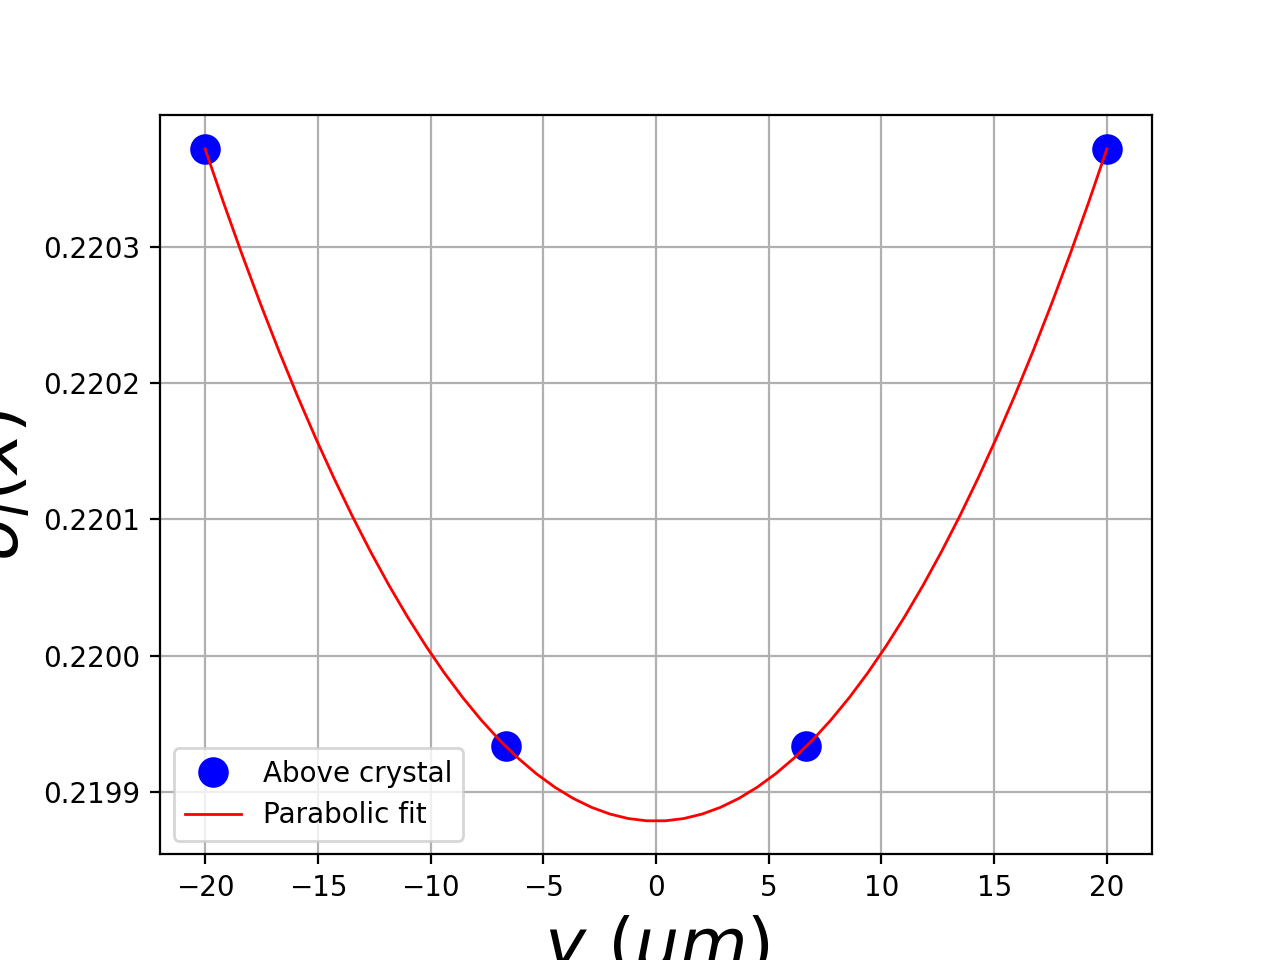

<IPython.core.display.Javascript object>


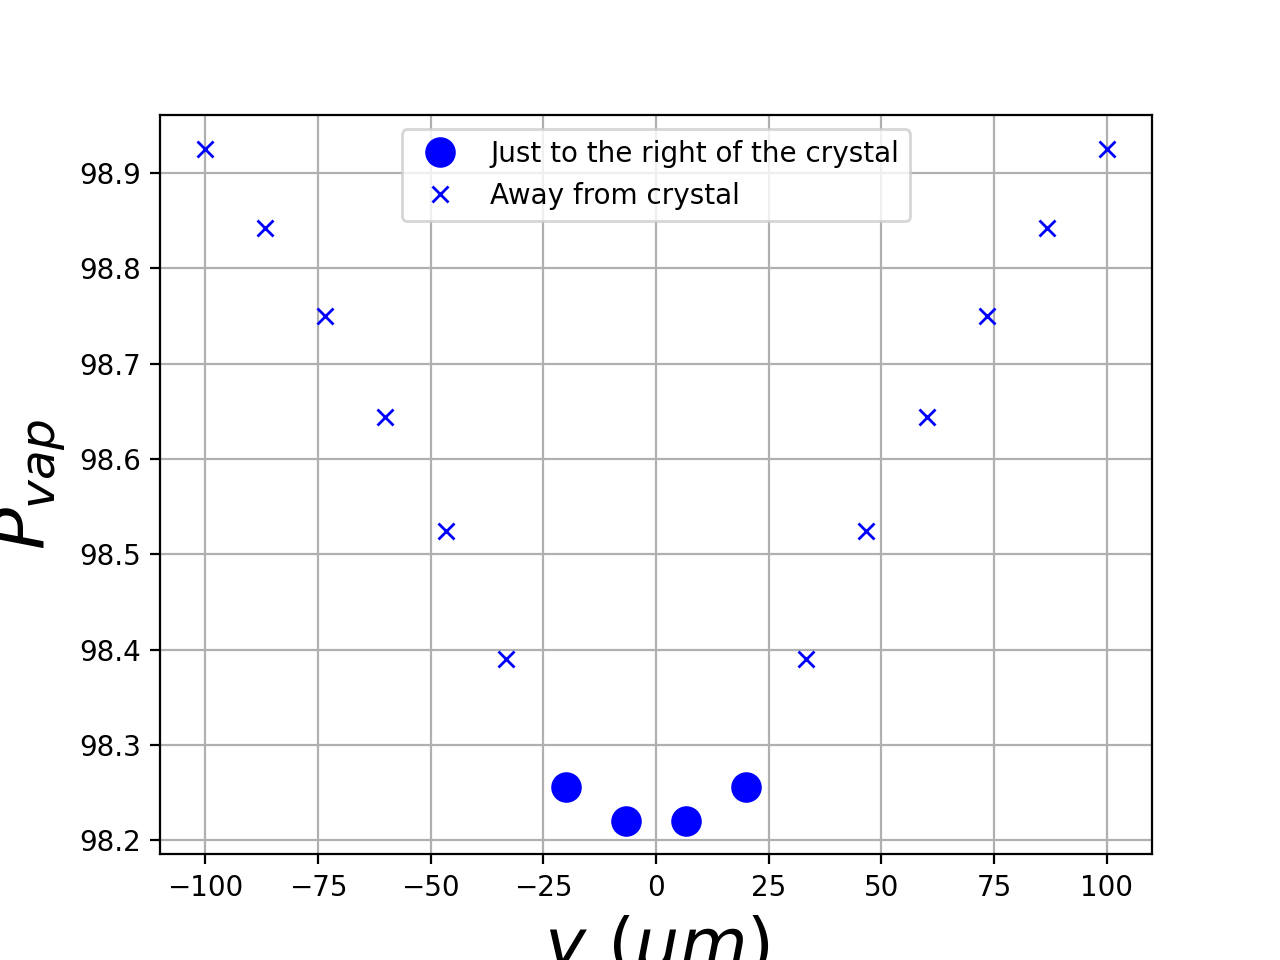

<IPython.core.display.Javascript object>


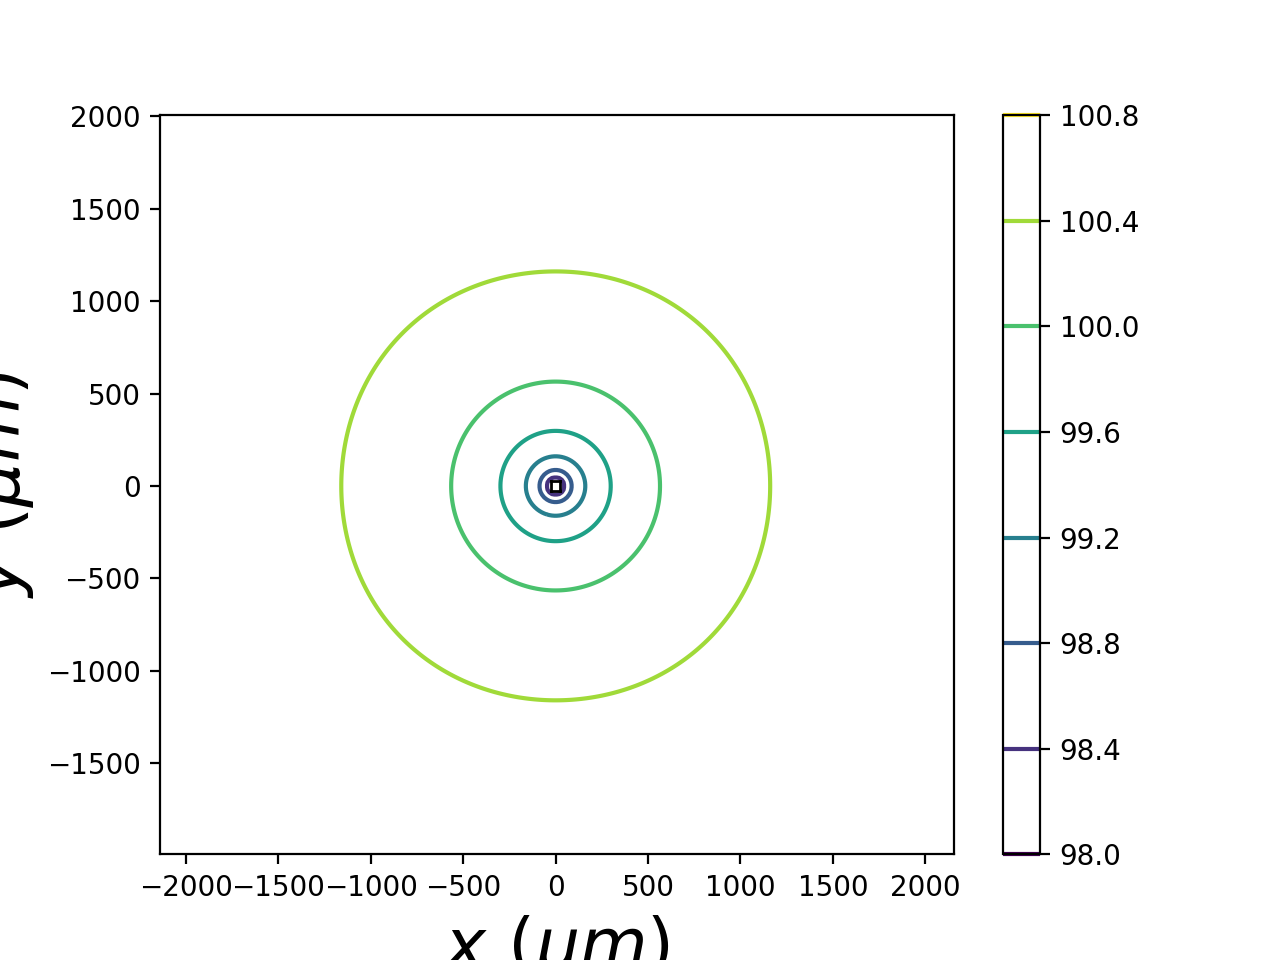

2
At the corner:
   sigmaI = 0.22037187533983715 dimensionless
   Pvap = 98.25564140006617 pascal
At the middle:
   sigmaI at middle =  0.2199334809292528 dimensionless
   Pvap = 98.22034500814777 pascal
Center reduction:
   numerical c_r = 0.0019893392017847175 dimensionless
   numerical c_r (%) = 0.19893392017847175 dimensionless


In [23]:
# Call the vaporfield code
tmax = AssignQuantity(15,'microsecond')
[x_vapor, sigmaIx_vapor], [y_vapor, sigmaIy_vapor], [x_entire, y_entire, Pvap_entire], [Lx_actual, Ly_actual] = \
    QLC.VF2DSquare(Temperature,Pressure,g_ice,sigmaI_far_field,L,\
             AssignQuantity, tmax_mag=tmax.magnitude, aspect_ratio=1, verbose=2, xmax_mag=2*x_f.magnitude, \
            nx=301, ny=301)

# Numerical results
ny_crystal = len(sigmaIy_vapor)
imid = int(ny_crystal/2); print(imid)
Pvap_corner = (sigmaIy_vapor[0]+1)*P_vap_eq
print('At the corner:')
print('   sigmaI =', sigmaIy_vapor[0])
print('   Pvap =', Pvap_corner)
Pvap_middle = (sigmaIy_vapor[imid]+1)*P_vap_eq
print('At the middle:')
print('   sigmaI at middle = ', sigmaIy_vapor[imid])
print('   Pvap =', Pvap_middle)
print('Center reduction:')
c_r = (sigmaIy_vapor[0]-sigmaIy_vapor[imid])/sigmaIy_vapor[0]
print('   numerical c_r =', c_r)
print('   numerical c_r (%) =', c_r*100)

<IPython.core.display.Javascript object>


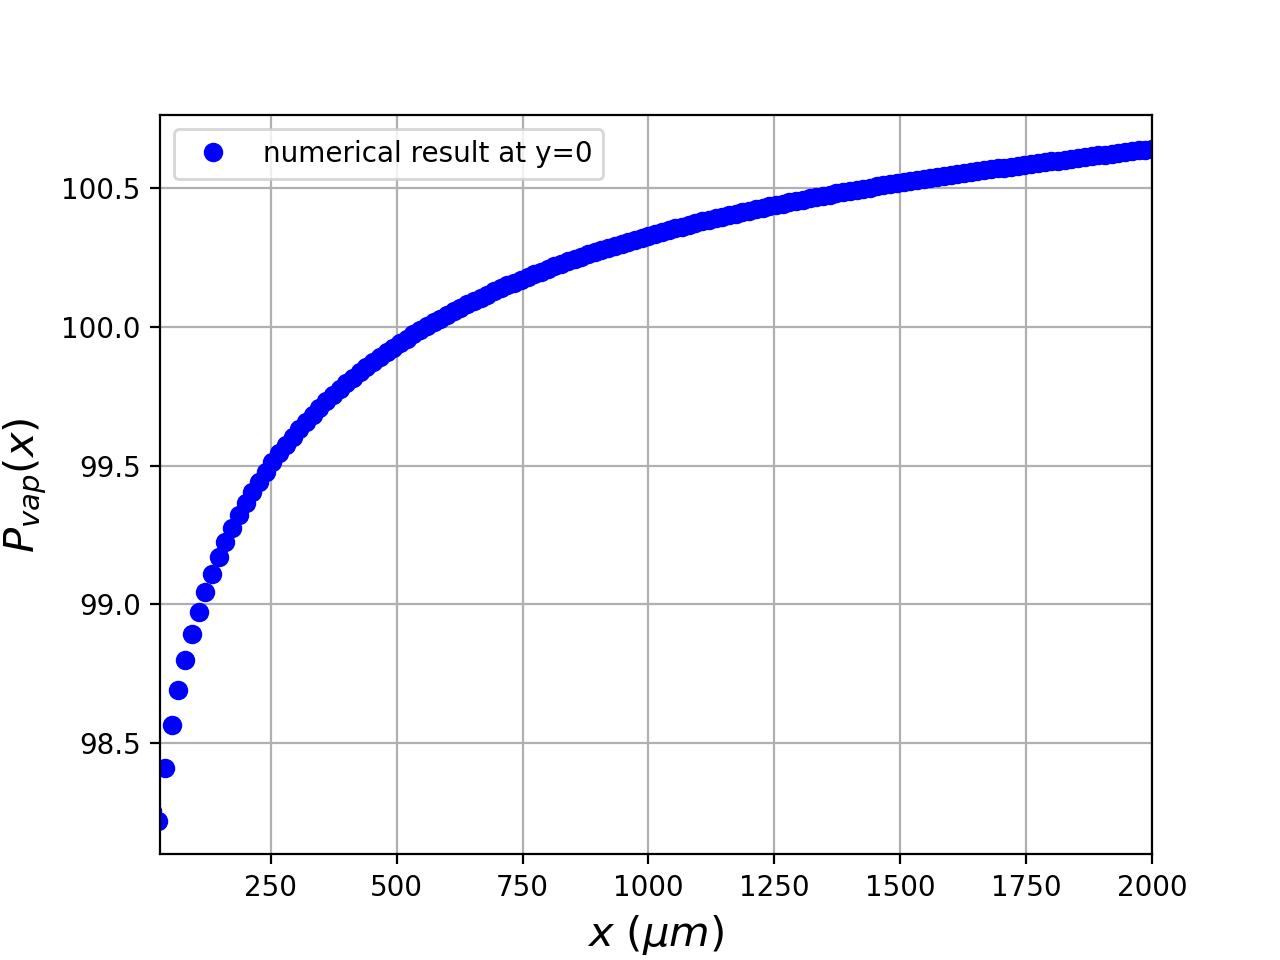

(30.0, 2000.0)

In [24]:
# Plot Pvap(x)
nx, ny = np.shape(Pvap_entire)
ixmid = int(nx/2); iymid=int(ny/2)
Pvap_numerical = Pvap_entire[:,iymid]

plt.figure()        
plt.plot(x_entire.magnitude,Pvap_numerical,'ob',label='numerical result at y=0')
plt.xlabel(r'$x$ ($\mu m$)', fontsize=fontsize)
plt.ylabel(r'$P_{vap}(x)$',fontsize=fontsize)
plt.grid(True)
plt.legend()
plt.xlim(L.magnitude,x_entire[-1].magnitude)

### Numerical solution in polar coordinates

In [25]:
perimeter_of_crystal = 8*Lx_actual
L_eff = perimeter_of_crystal/(2*np.pi)
print('Lx_actual =', Lx_actual)
print('L_eff =',L_eff)
r_1d,un_1d = QLC.VF2d_r1d(Temperature,Pressure,g_ice,sigmaI_far_field,L_eff,\
         AssignQuantity,verbose=1,\
         tmax_mag=tmax.magnitude, dt=0, nr=nx, rmax_mag=1000)

Lx_actual = 26.666666666666668 micrometer
L_eff = 33.95305452627101 micrometer
uneumann =  277.55017626862474 pascal / microsecond
Vapor pressure at this temperature =  80.5128693847561 pascal
udirichlet =  100.64108673094512 pascal
Integrating steps =  2724164
Integrating out to  14.999999725137515 microsecond


### Comparisons to analytical results

chi = 12263.200377242098 dimensionless
r0 = 0.16307626575567646 micrometer


<IPython.core.display.Javascript object>


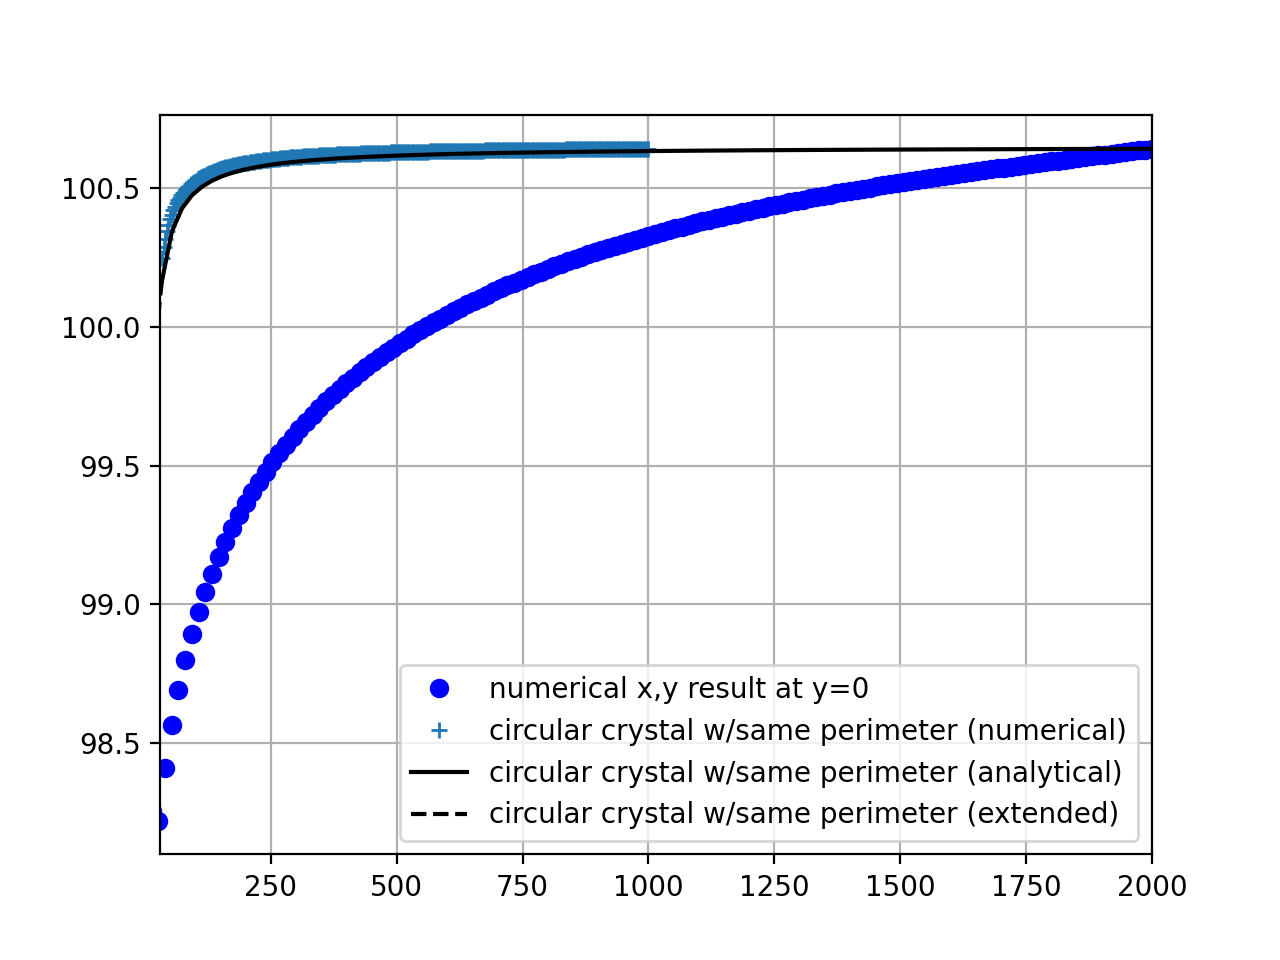

P_vap_corner = 100.21406455327649 pascal
analytical sigmaI_corner = 0.24469622457960138 dimensionless
P_vap_middle = 100.03378682643479 pascal
analytical sigmaI_middle = 0.24245710767544293 dimensionless
analytical c_r(%) = 0.9150598494134354 dimensionless


In [26]:
# Here's calculating parameters for the analytical result
r_f = x_f
chi = Dvap*P_f*r_f/(gprime*L_eff**2); chi.ito('dimensionless'); print('chi =', chi)
r_0 = r_f/(1+chi); print('r0 =', r_0)
P1 = P_f/(1-r_0/r_f)

# Here's the range of r-values to use for the analytical result
r_analytical = np.linspace(L_eff,r_f,100)
P_analytical = P1*(1-r_0/r_analytical)
r_analytical_extended = np.linspace(Lx_actual,L_eff,20)
P_analytical_extended = P1*(1-r_0/r_analytical_extended)

# Visualize all results so far as a function of distance from the side or corner of the crystal
plt.figure()
plt.plot(x_entire.magnitude,Pvap_numerical,'ob',label='numerical x,y result at y=0')
plt.plot(r_1d,un_1d,'+',label='circular crystal w/same perimeter (numerical)')
plt.plot(r_analytical,P_analytical,'k-',label='circular crystal w/same perimeter (analytical)')
plt.plot(r_analytical_extended,P_analytical_extended,'k--',label='circular crystal w/same perimeter (extended)')
plt.legend()
plt.xlim(L.magnitude,x_entire[-1].magnitude)
plt.grid(True)

# Calculating c_r from all this
L_corner = Lx_actual*2**.5
P_vap_corner = P1*(1-r_0/L_corner)
print('P_vap_corner =', P_vap_corner)
sigmaI_corner = P_vap_corner/P_vap_eq - 1
print('analytical sigmaI_corner =', sigmaI_corner)
P_vap_middle = P1*(1-r_0/Lx_actual)
print('P_vap_middle =', P_vap_middle)
sigmaI_middle = P_vap_middle/P_vap_eq - 1
print('analytical sigmaI_middle =', sigmaI_middle)
c_r_analytical = 1 - sigmaI_middle/sigmaI_corner
c_r_analytical_percent = c_r_analytical*100
print('analytical c_r(%) =', c_r_analytical_percent)

### Analysis
What the above shows is that for the steady-state solution in polar coordinates, we get the same results analytically and numerically. Yay!

It also means that we can use the analytical extension of the solution ($P_{vap} = P_1 \times (1-{r_0 \over r})$) to predict $P_{vap}$ at the middle of a crystal side, and to a corner, from which we can predict a center reduction

$$
c_r = 1 - {\sigma_I(0) \over \sigma_I(L)} \ \ \ \ (8)
$$

The parabolic approximation in terms of this curvature is

$$
\sigma_I(x) \approx \sigma_I(L) \times \bigl (c_r ({x \over L})^2 +1 -c_r \bigr )  \ \ \ \ (9)
$$

so that $\sigma_I(x)=\sigma_I(L)$ when $x=L$, and $\sigma_I(0)$ when $x=0$.

For a sample case ($T=250 \ K$, $P=30 \ Pa$, $L=30 \ \mu m$, and $\sigma_{I,f}=0.25$), we get $c_r=0.2\%$ from the 2-D numerical simulation, whereas the exact solution with the "circular approximation," using the "equivalent circumference assumption," gives $c_r=0.9\%$. 

With this, we can imagine a self-consistency loop in which, for a given set of parameters {$T$, $P$, $L$, $\sigma_{I,far}$, and $x_{far}$},

1. Use the analytical vaporfield result to map $g_{ice} → \sigma_{I,corner}$ & $c_r$
1. Use QLC-2 to map $\sigma_{I,corner}$ & $c_r → g_{ice}$
1. Repeat till converged